<a href="https://colab.research.google.com/github/AndrewRober/MaxpoolingDemo/blob/main/MaxpoolingDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Install required libraries
!pip install scikit-image
!pip install beautifulsoup4 lxml

# Import necessary libraries
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import re
from bs4 import BeautifulSoup
from urllib.parse import urljoin, unquote

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
# Function to download an image from Bing Image Search based on a query
def download_image(query):
    # Replace spaces in the query with '+' for URL encoding
    query = query.replace(' ', '+')

    # Construct the URL for Bing Image Search
    url = f"https://www.bing.com/images/search?q={query}"

    # Set headers for the request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}

    # Make the request
    response = requests.get(url, headers=headers)

    # Parse the response content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'lxml')

    # Find all image tags with a specific class
    image_tags = soup.find_all("a", class_="iusc")

    # Loop through the image tags
    for img in image_tags:
        # Get the image URL from the tag
        img_url = img.get("m")

        # If the image URL is not empty
        if img_url is not None:
            try:
                # Extract the actual image URL from the JSON string
                img_url = unquote(img_url.split('"murl":"')[-1].split('","')[0])

                # Make a request for the image
                response = requests.get(img_url, headers=headers)

                # Open the image using PIL's Image module
                img = Image.open(BytesIO(response.content))

                # Convert the image to RGB and return it
                return img.convert("RGB")
            except Exception as e:
                print(f"Error: {e}")
                continue
    return None

In [62]:
# Function for max-pooling an image (reducing its dimensions)
def max_pooling2d(image, pool_size):
    if len(image.shape) == 2:  # Grayscale image
        max_pooled_image = block_reduce(image, (pool_size, pool_size), func=np.max)
    elif image.shape[2] == 4:  # Image has an alpha channel
        rgb_image = image[:, :, :3]
        alpha_image = image[:, :, 3]
        max_pooled_alpha = block_reduce(alpha_image, (pool_size, pool_size), func=np.max)
        max_pooled_rgb = block_reduce(rgb_image, (pool_size, pool_size, 1), func=np.max)
        max_pooled_image = np.dstack((max_pooled_rgb, max_pooled_alpha))
    else:  # Image has no alpha channel
        max_pooled_image = block_reduce(image, (pool_size, pool_size, 1), func=np.max)
    return max_pooled_image

Image shape: (1415, 2119, 3)
Image shape: (708, 1060, 3)
Image shape: (354, 530, 3)
Image shape: (177, 265, 3)


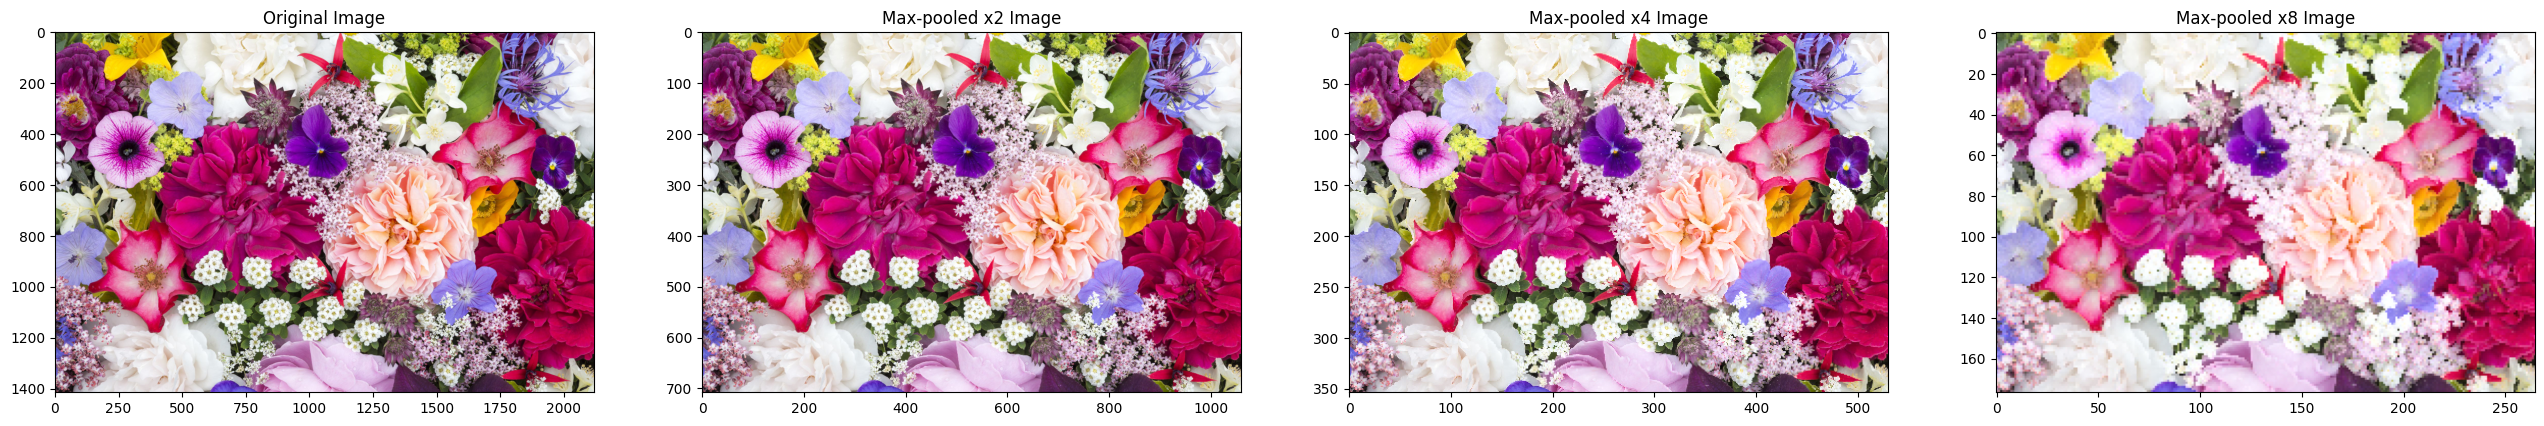

Image shape: (1067, 1600, 3)
Image shape: (534, 800, 3)
Image shape: (267, 400, 3)
Image shape: (134, 200, 3)


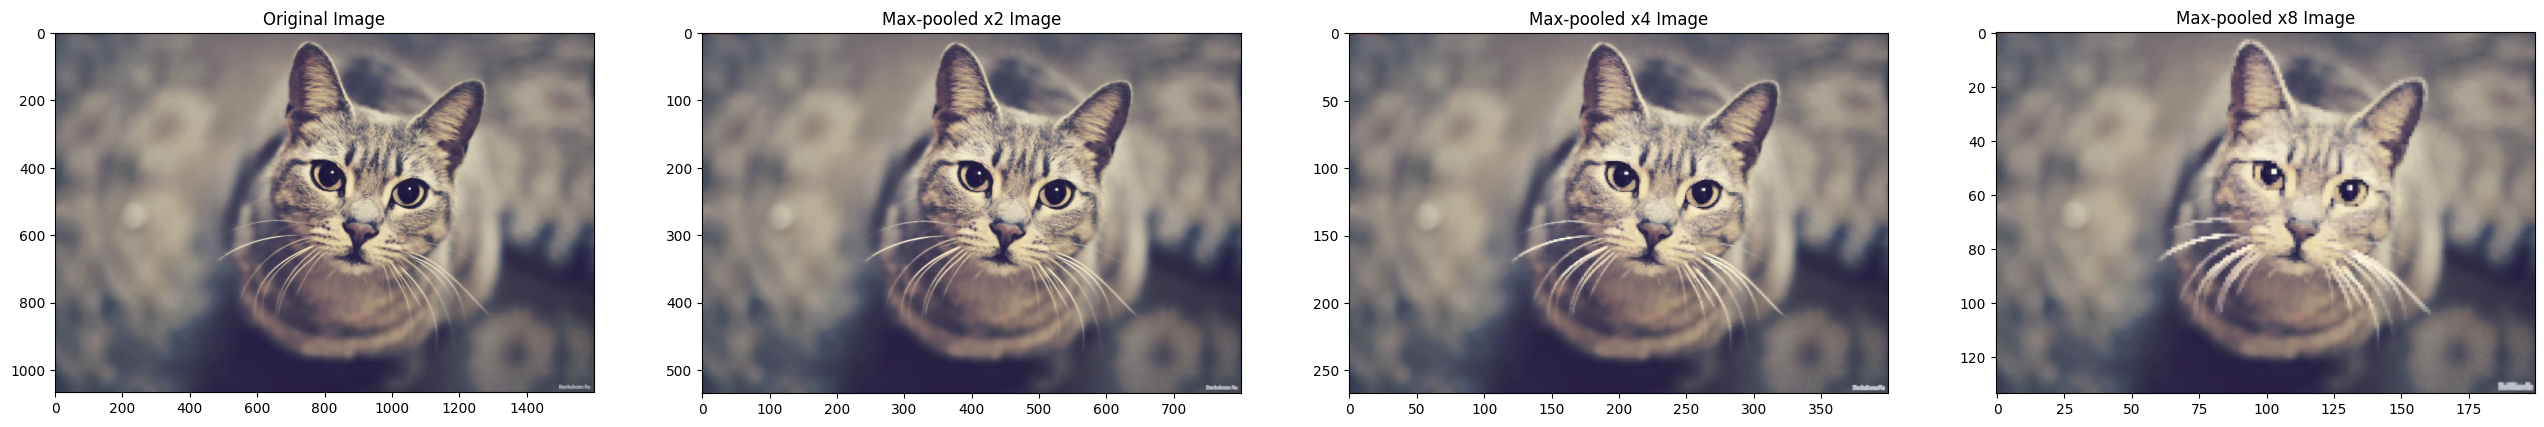

Image shape: (730, 1524, 3)
Image shape: (365, 762, 3)
Image shape: (183, 381, 3)
Image shape: (92, 191, 3)


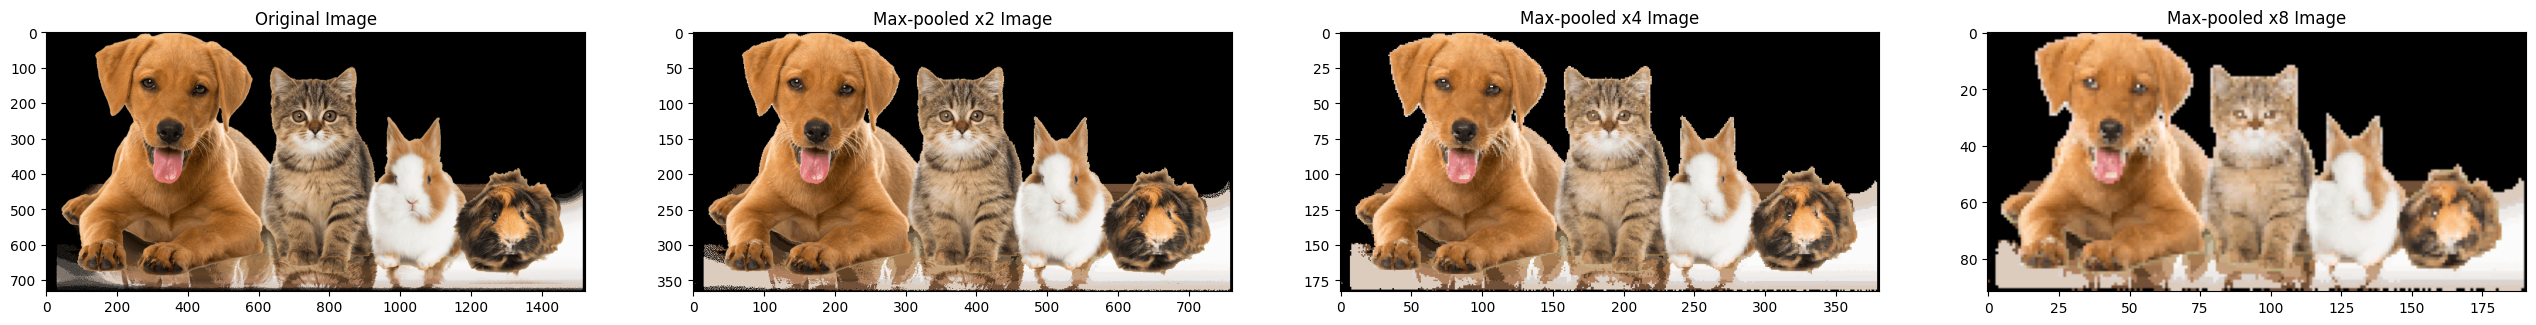

In [64]:
# Test the code with some search queries
search_queries = ["flower", "cat", "dog"]

for query in search_queries:
    # Download an image using the `download_image` function
    original_img = download_image(query)

    if original_img is None:
        print("Image not found or not compatible. Skipping...")
        continue

    # Convert the image to a NumPy array
    original_img_array = np.array(original_img)
    print("Image shape:", original_img_array.shape)

    # Max-pool the image with different pool sizes
    max_pooled_img = max_pooling2d(original_img_array, 2)
    print("Image shape:", max_pooled_img.shape)
    max_pooled_img4 = max_pooling2d(original_img_array, 4)
    print("Image shape:", max_pooled_img4.shape)
    max_pooled_img8 = max_pooling2d(original_img_array, 8)
    print("Image shape:", max_pooled_img8.shape)

    # Plot and display the original and max-pooled images
    fig, axes = plt.subplots(1, 4, figsize=(32, 32))
    axes[0].imshow(original_img)
    axes[0].set_title("Original Image")
    axes[1].imshow(max_pooled_img)
    axes[1].set_title("Max-pooled x2 Image")
    axes[2].imshow(max_pooled_img4)
    axes[2].set_title("Max-pooled x4 Image")
    axes[3].imshow(max_pooled_img8)
    axes[3].set_title("Max-pooled x8 Image")
    plt.show()